# Imports

In [81]:
import pandas as pd
import seaborn as sns
import requests
from cobra import test

# 1
Let's start with something relaxing: solve the crossword!

In [17]:
df = pd.DataFrame({"[JUNDT]*":['D', 'T', 'N'],
                   "APA|OPI|OLK":['O', 'P', 'I'],
                   "(NA|FE|HE)[CV]":['N', 'A', 'K']})
df.index = ['[DEF][MNO]*', '[^DJNU]P[ABC]', '[ICAN]*']
df

,[JUNDT]*,APA|OPI|OLK,(NA|FE|HE)[CV]
[DEF][MNO]*,D,O,N
[^DJNU]P[ABC],T,P,A
[ICAN]*,N,I,K


# 2
You have some dataset describing concentrations of five algae metabolites. For each algae there is a species name, its genus and its group.
- Using pandas library find the average concentration of each of the metabolite in each aglae
genus.
- Visualize the result using seaborn library.

In [18]:
df = pd.read_csv("data_for_task2.csv")
df

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


In [28]:
formatted_df = pd.melt(frame = df, id_vars = ["species", "genus", "group"])
formatted_df = formatted_df.rename(columns = {'variable':'metabolite', 'value':'concentration'})
formatted_df.head(10)

,species,genus,group,metabolite,concentration
0,Fucus_vesiculosus,Fucus,brown,sucrose,3.001472
1,Saccharina_japonica,Saccharina,brown,sucrose,6.731070
2,Fucus_serratus,Fucus,brown,sucrose,3.276870
3,Fucus_distichus,Fucus,brown,sucrose,6.786996
4,Cladophora_fracta,Cladophora,green,sucrose,3.861470
5,Cladophora_compacta,Cladophora,green,sucrose,5.712284
6,Cladophora_gracilis,Cladophora,green,sucrose,2.452623
7,Palmaria_palmata,Palmaria,red,sucrose,0.704580
8,Saccharina_latissima,Saccharina,brown,sucrose,1.636122
9,Ascophyllum_nodosum,Ascophyllum,brown,sucrose,6.825467


In [33]:
avg_df = formatted_df.groupby(['genus', 'metabolite'], as_index = False).mean()
avg_df

,genus,metabolite,concentration
0,Ascophyllum,alanin,0.875429
1,Ascophyllum,citrate,5.253527
2,Ascophyllum,glucose,3.414961
3,Ascophyllum,oleic_acid,2.432526
4,Ascophyllum,sucrose,6.825467
5,Cladophora,alanin,3.997055
6,Cladophora,citrate,5.288311
7,Cladophora,glucose,2.800276
8,Cladophora,oleic_acid,2.263472
9,Cladophora,sucrose,4.008792


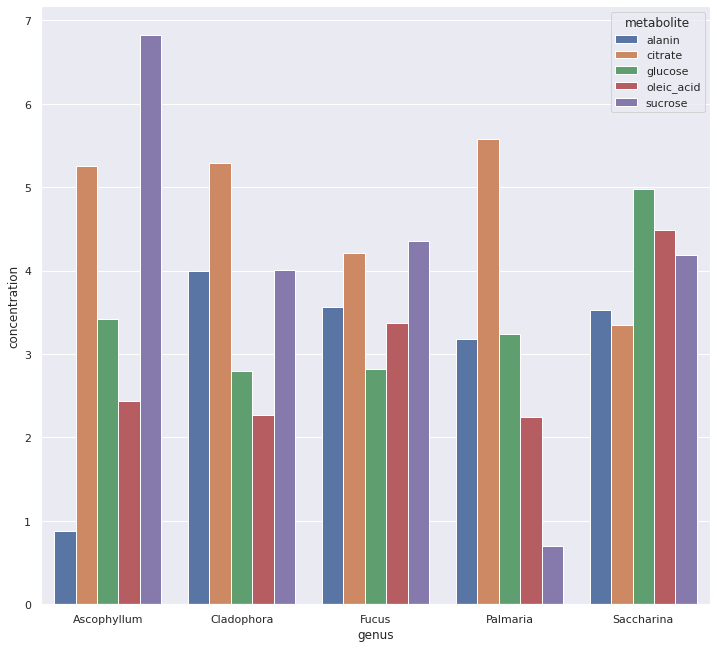

In [36]:
g = sns.barplot(x="genus",
                y="concentration", 
                hue="metabolite", 
                data = avg_df)

# 3
You have noticed that map() function returns something different than list. Simply saying, it returns iterator. In this connection, we used list(map(...)) syntax but remember that iterators in some cases are more preferable than lists.

This task is devoted to understanding (repeating) how iterators work.
- First create iterator via my_iter = map(lambda ...) construction that takes [1,2,3,4,5,6] and returns True if there is no remainder after division of the list’s element on 3 and returns False otherwise.
- In infinite loop proceed the iterator using the next() function on it. Observe the appearing error in this loop.
- Write except block catching this particular (!) error.
- Based on this usecase try to understand (remember) in which cases iterators might be more preferable than lists and write down your thoughts.

In [60]:
my_iter = map(lambda x: x%3 == 0, [1,2,3,4,5,6])
while True:
    print(next(my_iter))

False
False
True
False
False
True


StopIteration: 

In [59]:
my_iter = map(lambda x: x%3 == 0, [1,2,3,4,5,6])
while True:
    try:
        print(next(my_iter))
    except StopIteration:
        break

False
False
True
False
False
True


Iteratiors are more preferable than lists in cases when we have massive chunk of data and not always go till its end and there is no need to calculate or fill all values in the moment of creating the object. Or even if we do then we do not use memory to store the whole array.

# 4
In this task you need to use API of numbersapi.com site.

You are given a set of numbers: 22, 43, 264, 1990. For each of the numbers, you need to find out if
there is an interesting mathematical or historical fact about it. The answer should contain these facts
marked as “MATH:” or “HIST:”.

In [78]:
numbers = {22, 43, 264, 1990}
URL = "http://numbersapi.com"
fact_types = {"MATH:":"math", "HIST:":"date"}

for res_type, url_type in fact_types.items():
    for num in numbers:
        res = requests.get(f"{URL}/{str(num)}/{url_type}")
        if result.ok:
            print(res_type, res.text)

MATH: 264 is the largest known number whose square is undulating.
MATH: 43 is a centered heptagonal number.
MATH: 1990 is a stella octangula number.
MATH: 22 is a pentagonal number and a centered heptagonal number.
HIST: September 20th is the day in 2000 that the British MI6 Secret Intelligence Service building is attacked by unapprehended forces using a Russian-built RPG-22 anti-tank missile.
HIST: February 12th is the day in 1855 that Michigan State University is established.
HIST: June 12th is the day in 1990 that Russia Day – the parliament of the Russian Federation formally declares its sovereignty.
HIST: January 22nd is the day in 1973 that a chartered Boeing 707 explodes in flames upon landing at Kano Airport, Nigeria, killing 176.


# 5
Explore cobra’s preloaded core metabolism model of E.coli: 

from cobra import test

model = test.create_test_model("textbook") # Name: e_coli_core

Knock out gene b3236 and write down what has changed in NADH production in cytosol.

In [88]:
model = test.create_test_model("textbook") # Name: e_coli_core
model.metabolites.nadh_c.summary()

Percent,Flux,Reaction,Definition
13.14%,5.064,AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
8.04%,3.1,Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
41.58%,16.02,GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
13.14%,5.064,MDH,mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
24.09%,9.283,PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
Percent,Flux,Reaction,Definition
100.00%,-38.53,NADH16,4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c


In [89]:
model.genes.b3236.knock_out()
model.optimize()
model.metabolites.nadh_c.summary()

Percent,Flux,Reaction,Definition
18.46%,7.449,AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
7.26%,2.929,Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
44.12%,17.8,GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
1.83%,0.738,ME1,mal__L_c + nad_c --> co2_c + nadh_c + pyr_c
28.34%,11.43,PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
Percent,Flux,Reaction,Definition
100.00%,-40.36,NADH16,4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c


After b3236 gene knock out MDH reaction disappeared.

The article of Bashir Sajo Mienda & Mohd Shahir Shamsir demonstrates that "an additional molecule of NADH could have been generated by the deletion of the mdh/b3236 gene. These findings open-up a novel and/or comprehensive model-aided discovery on the metabolic mechanism of NADH regeneration in relation to succinate production in E. coli after the mdh/b3236 gene knockout" (https://doi.org/10.1080/07391102.2015.1032786).